In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from preprocess import slice_histogram_match
from datasets import makedatasets
np.random.seed(1314)
# Get require data
types = ['C0LGE','LGE','T2LGE']
image_, label_ , _ = makedatasets(types)

/home/lucar/anaconda3/envs/d2l/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


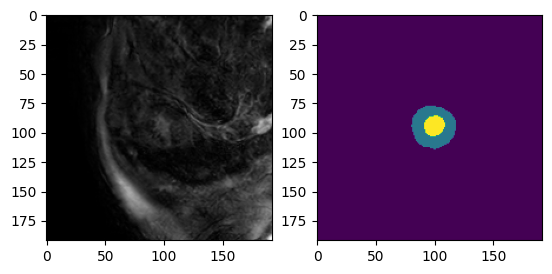

In [8]:
index = 90
image = image_[index]
label = label_[index]
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(label)

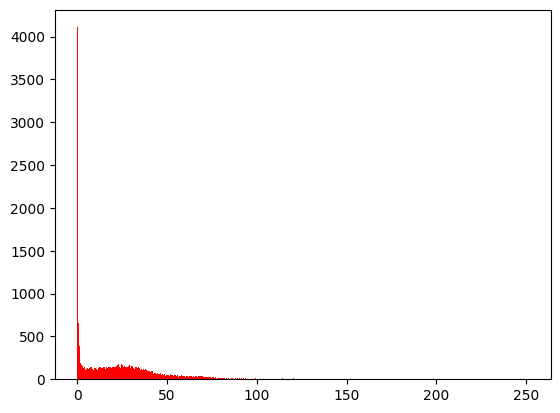

In [9]:
from utils import drawhistogram
drawhistogram(image)